## Retrieval Stats

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("retrieval_eval_by_source.json", "r", encoding="utf-8") as f:
    results = json.load(f)

In [6]:
x = np.arange(len(categories))
width = 0.2

In [9]:
categories = list(results.keys())
hit1 = [results[src]["hit@1_ratio"] for src in categories]
hit3 = [results[src]["hit@3_ratio"] for src in categories]
sim1 = [results[src]["avg_sim_top1"] for src in categories]
sim3 = [results[src]["avg_sim_top3"] for src in categories]

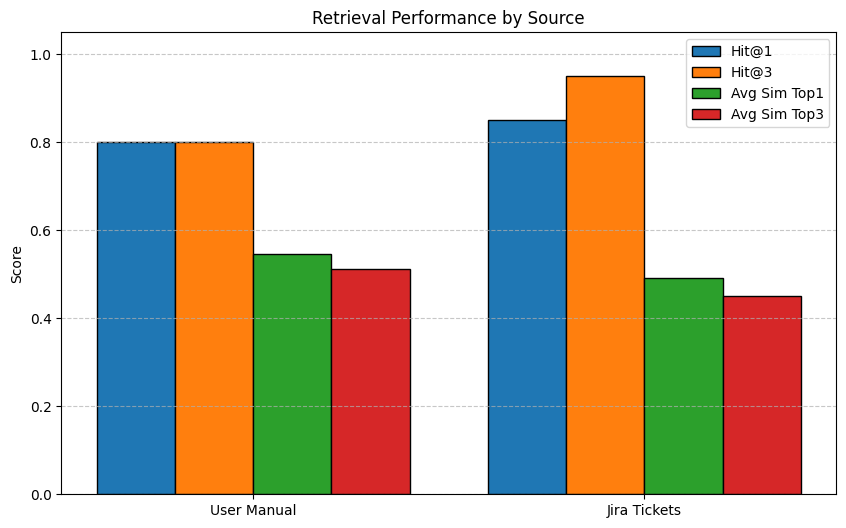

In [12]:
# Create bar plots
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5 * width, hit1, width, label='Hit@1', edgecolor='black')
bars2 = ax.bar(x - 0.5 * width, hit3, width, label='Hit@3', edgecolor='black')
bars3 = ax.bar(x + 0.5 * width, sim1, width, label='Avg Sim Top1', edgecolor='black')
bars4 = ax.bar(x + 1.5 * width, sim3, width, label='Avg Sim Top3', edgecolor='black')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Retrieval Performance by Source')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

## LLM as a judge RAGAS Stats

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
with open("ragas_eval.json", "r", encoding="utf-8") as f:
    data = json.load(f)


In [17]:
df = pd.json_normalize(data)


In [18]:
print("Sample entries:")
display(df[["question", "source", "rag_metrics.answer_relevancy", "rag_metrics.faithfulness"]].head())


Sample entries:


,question,source,rag_metrics.answer_relevancy,rag_metrics.faithfulness
0,Who can access the Build Statistics feature in...,User Manual,1.000000,0.733333
1,What steps are required to generate build stat...,User Manual,0.991559,0.777778
2,How do I edit an existing Working Profile in CAP?,User Manual,0.990168,0.875000
3,Where can I go to report an incident or reques...,User Manual,0.981487,0.700000
4,How can I access the Working Profile section f...,User Manual,0.992514,0.655556


In [19]:
df.rename(columns={
    "rag_metrics.answer_relevancy": "answer_relevancy",
    "rag_metrics.faithfulness": "faithfulness",
    "rag_metrics.context_precision": "context_precision",
    "rag_metrics.context_recall": "context_recall"
}, inplace=True)

In [20]:
metrics = ["answer_relevancy", "faithfulness", "context_precision", "context_recall"]
df[metrics] = df[metrics].astype(float)


In [21]:
summary_stats = df[metrics].describe()
print("Summary Statistics:")
display(summary_stats)


Summary Statistics:


,answer_relevancy,faithfulness,context_precision,context_recall
count,40.000000,40.000000,40.000000,40.000000
mean,0.908285,0.672141,0.837187,0.791667
std,0.230830,0.213935,0.313200,0.332263
min,0.000000,0.300000,0.000000,0.000000
25%,0.958976,0.528571,0.865625,0.625000
50%,0.982568,0.671429,1.000000,1.000000
75%,0.995298,0.804545,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [22]:
source_group = df.groupby("source")[metrics].mean()
print("Average Metrics by Source:")
display(source_group)

Average Metrics by Source:


,answer_relevancy,faithfulness,context_precision,context_recall
source,,,,
Jira Tickets,0.830675,0.625651,0.784375,0.862500
User Manual,0.985895,0.718631,0.890000,0.720833


In [23]:
source_counts = df["source"].value_counts()
print("Entries per Source:")
display(source_counts)


Entries per Source:


source
User Manual     20
Jira Tickets    20
Name: count, dtype: int64

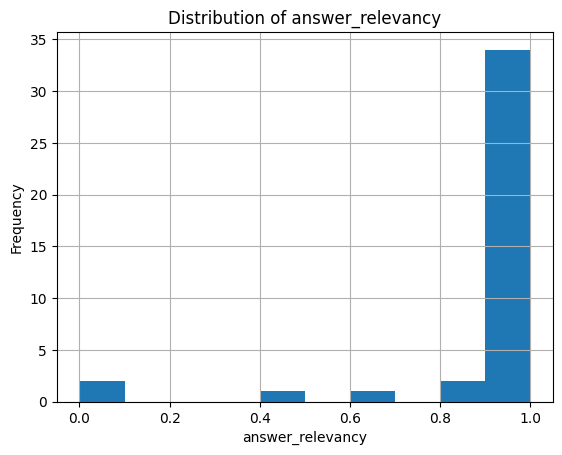

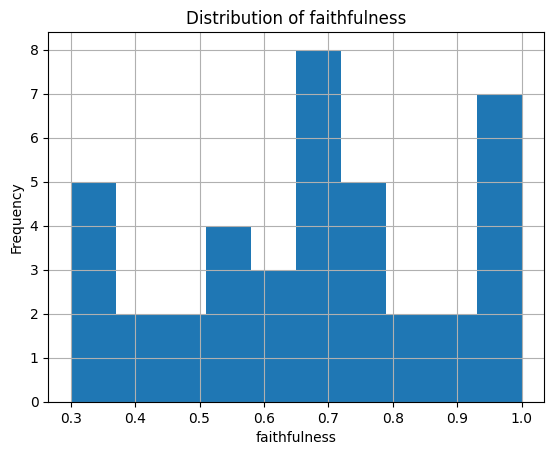

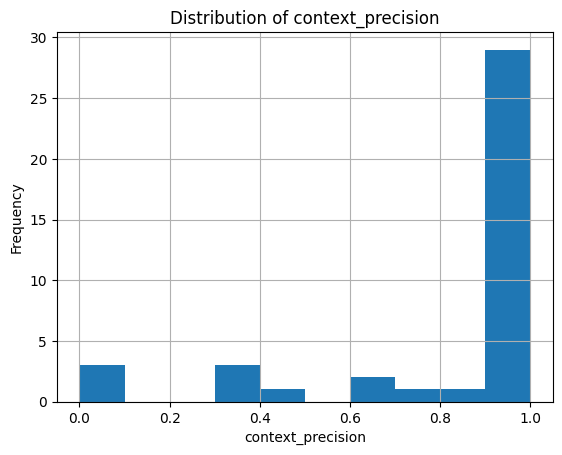

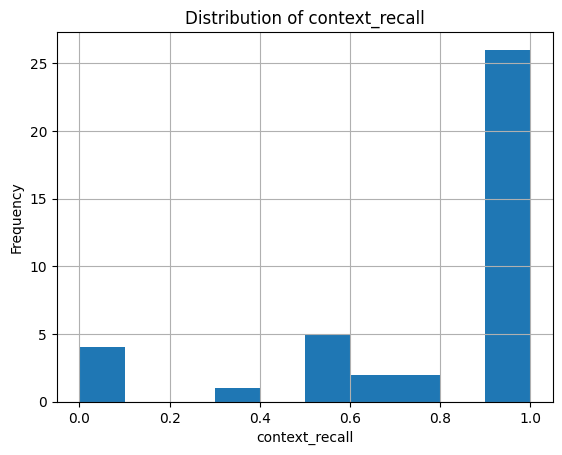

In [24]:
for metric in metrics:
    plt.figure()
    df[metric].hist(bins=10)
    plt.title(f"Distribution of {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

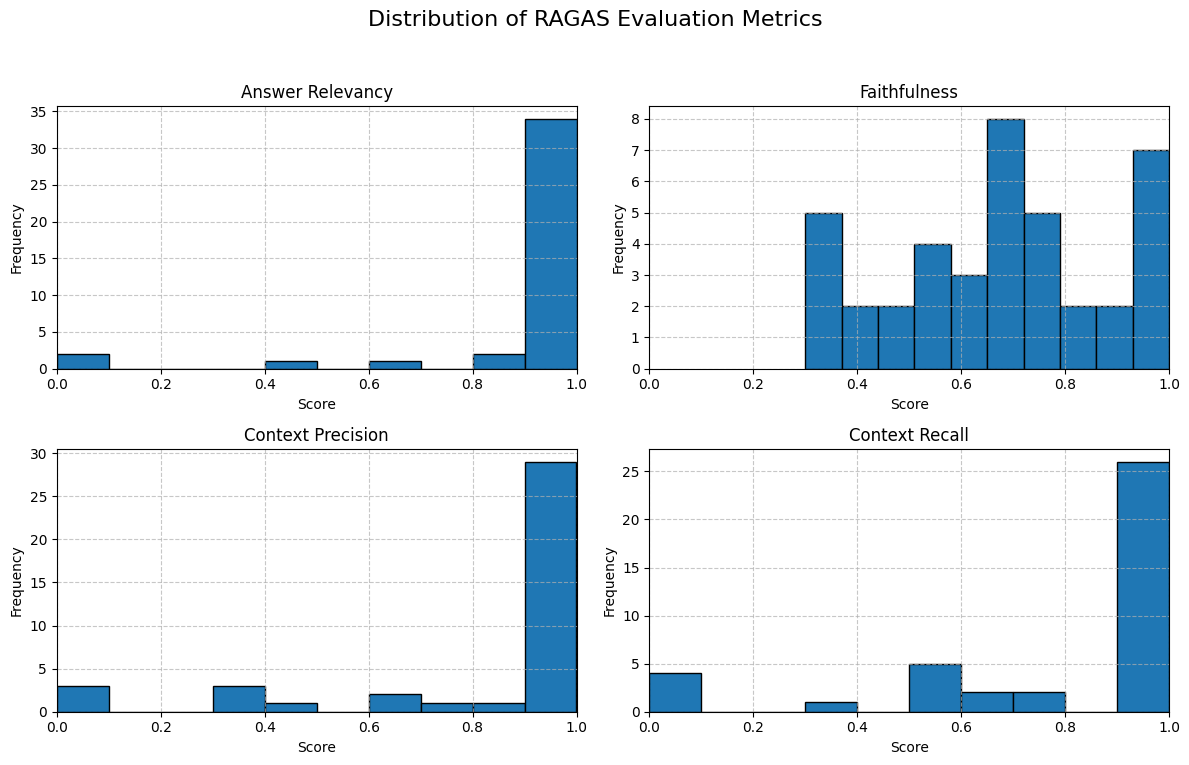

In [25]:

# Define 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of RAGAS Evaluation Metrics", fontsize=16)

# Flatten axes and plot each metric
for ax, metric in zip(axes.flat, metrics):
    df[metric].hist(ax=ax, bins=10, color='#1f77b4', edgecolor='black')
    ax.set_title(metric.replace("_", " ").title())
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


## Baseline stats

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

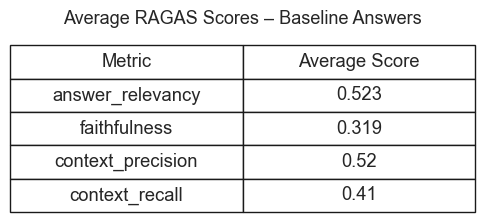

In [31]:


metrics = ["answer_relevancy", "faithfulness", "context_precision", "context_recall"]

avg_metrics = baseline_df[metrics].mean().round(3).rename("Baseline")

summary_table = avg_metrics.reset_index()
summary_table.columns = ["Metric", "Average Score"]


plt.figure(figsize=(6, 2))
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
table = plt.table(cellText=summary_table.values,
                  colLabels=summary_table.columns,
                  cellLoc='center',
                  loc='center')
table.scale(1, 2)
plt.axis('off')
plt.title("Average RAGAS Scores – Baseline Answers", fontsize=13, pad=20)
plt.show()


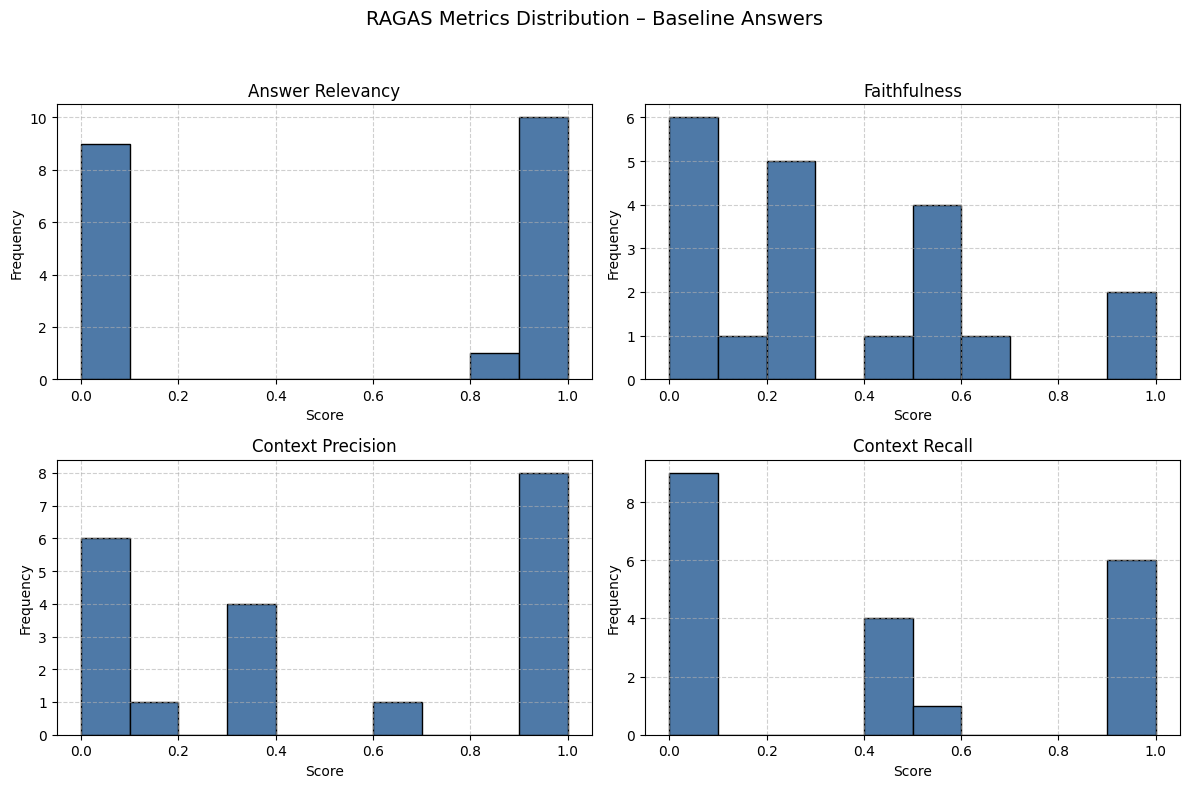

In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the baseline RAGAS evaluation results
with open("baseline_ragas_results.json", "r", encoding="utf-8") as f:
    baseline_data = json.load(f)

# Normalize to DataFrame
baseline_df = pd.json_normalize(baseline_data)

# Define metrics to plot
metrics = ["answer_relevancy", "faithfulness", "context_precision", "context_recall"]

# Convert to float
baseline_df[metrics] = baseline_df[metrics].astype(float)

# Plot 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("RAGAS Metrics Distribution – Baseline Answers", fontsize=14)

for idx, metric in enumerate(metrics):
    row, col = divmod(idx, 2)
    ax = axes[row][col]
    baseline_df[metric].hist(ax=ax, bins=10, color="#4e79a7", edgecolor="black")
    ax.set_title(metric.replace("_", " ").title())
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")
    ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
